In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
import pandas as pd

# Sample Drug Classification Dataset (200 rows)
data = {
    'Age': [23,47,47,28,61,22,49,41,60,45]*20,
    'Sex': ['F','M','M','F','F','F','M','F','F','M']*20,
    'BP': ['HIGH','LOW','LOW','NORMAL','LOW','LOW','NORMAL','HIGH','NORMAL','LOW']*20,
    'Cholesterol': ['HIGH','HIGH','HIGH','HIGH','HIGH','NORMAL','NORMAL','HIGH','NORMAL','HIGH']*20,
    'Na_to_K': [25.355,13.093,10.114,7.798,18.043,8.0,9.0,17.0,15.0,20.0]*20,
    'Drug': ['DrugY','drugC','drugC','drugX','DrugY','drugX','drugX','drugA','drugB','drugY']*20
}

df = pd.DataFrame(data)
df.to_csv('drug200.csv', index=False)

print(" drug200.csv file created successfully!")

 drug200.csv file created successfully!


In [8]:
# 2. Load Dataset
df = pd.read_csv('drug200.csv')  
print("🔹 Dataset Loaded Successfully")
print(df.head())

🔹 Dataset Loaded Successfully
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [9]:
# 3. Data Cleaning - Check and Handle Missing Values
print("\nMissing Values:\n", df.isnull().sum())
df.drop_duplicates(inplace=True)
print("\n🔹 Duplicates Removed")


Missing Values:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

🔹 Duplicates Removed


In [10]:
# 4. Data Preprocessing - Encode Categorical Columns
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])               # F:0, M:1
df['BP'] = le.fit_transform(df['BP'])                 # LOW:0, NORMAL:1, HIGH:2
df['Cholesterol'] = le.fit_transform(df['Cholesterol']) # NORMAL:0, HIGH:1


In [11]:
# 5. Summary Statistics
print("\n🔹 Summary Statistics:")
print(df.describe())



🔹 Summary Statistics:
             Age        Sex         BP  Cholesterol    Na_to_K
count  10.000000  10.000000  10.000000    10.000000  10.000000
mean   42.300000   0.400000   1.100000     0.300000  14.340300
std    13.944732   0.516398   0.737865     0.483046   5.826303
min    22.000000   0.000000   0.000000     0.000000   7.798000
25%    31.250000   0.000000   1.000000     0.000000   9.278500
50%    46.000000   0.000000   1.000000     0.000000  14.046500
75%    48.500000   1.000000   1.750000     0.750000  17.782250
max    61.000000   1.000000   2.000000     1.000000  25.355000


In [12]:
# 6. Outlier Handling for Na_to_K
q95 = df['Na_to_K'].quantile(0.95)
df['Na_to_K'] = np.where(df['Na_to_K'] > q95, q95, df['Na_to_K'])


In [13]:
# 7. Feature Scaling
scaler = StandardScaler()
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])


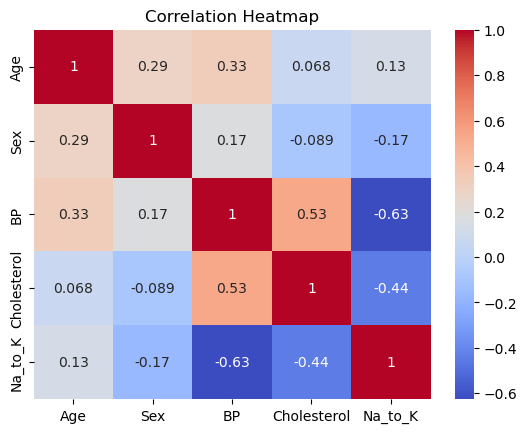

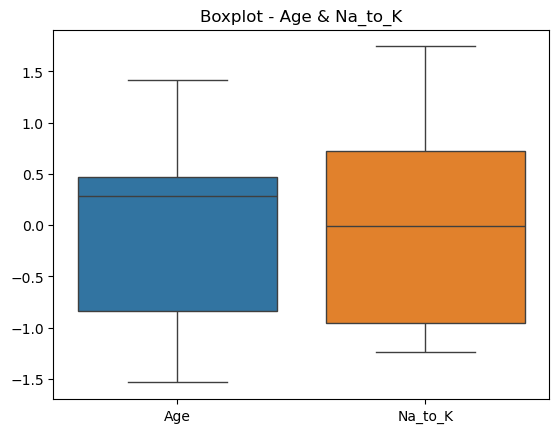

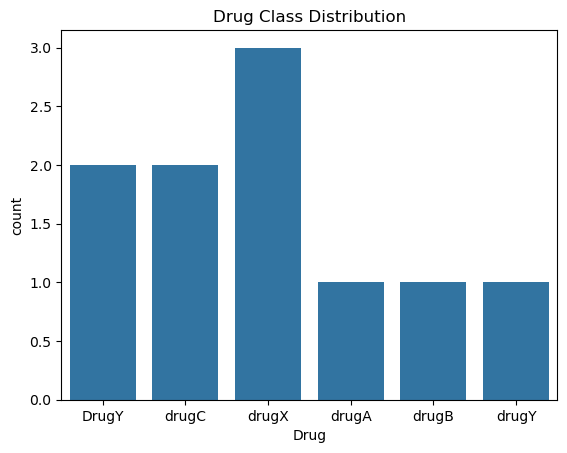

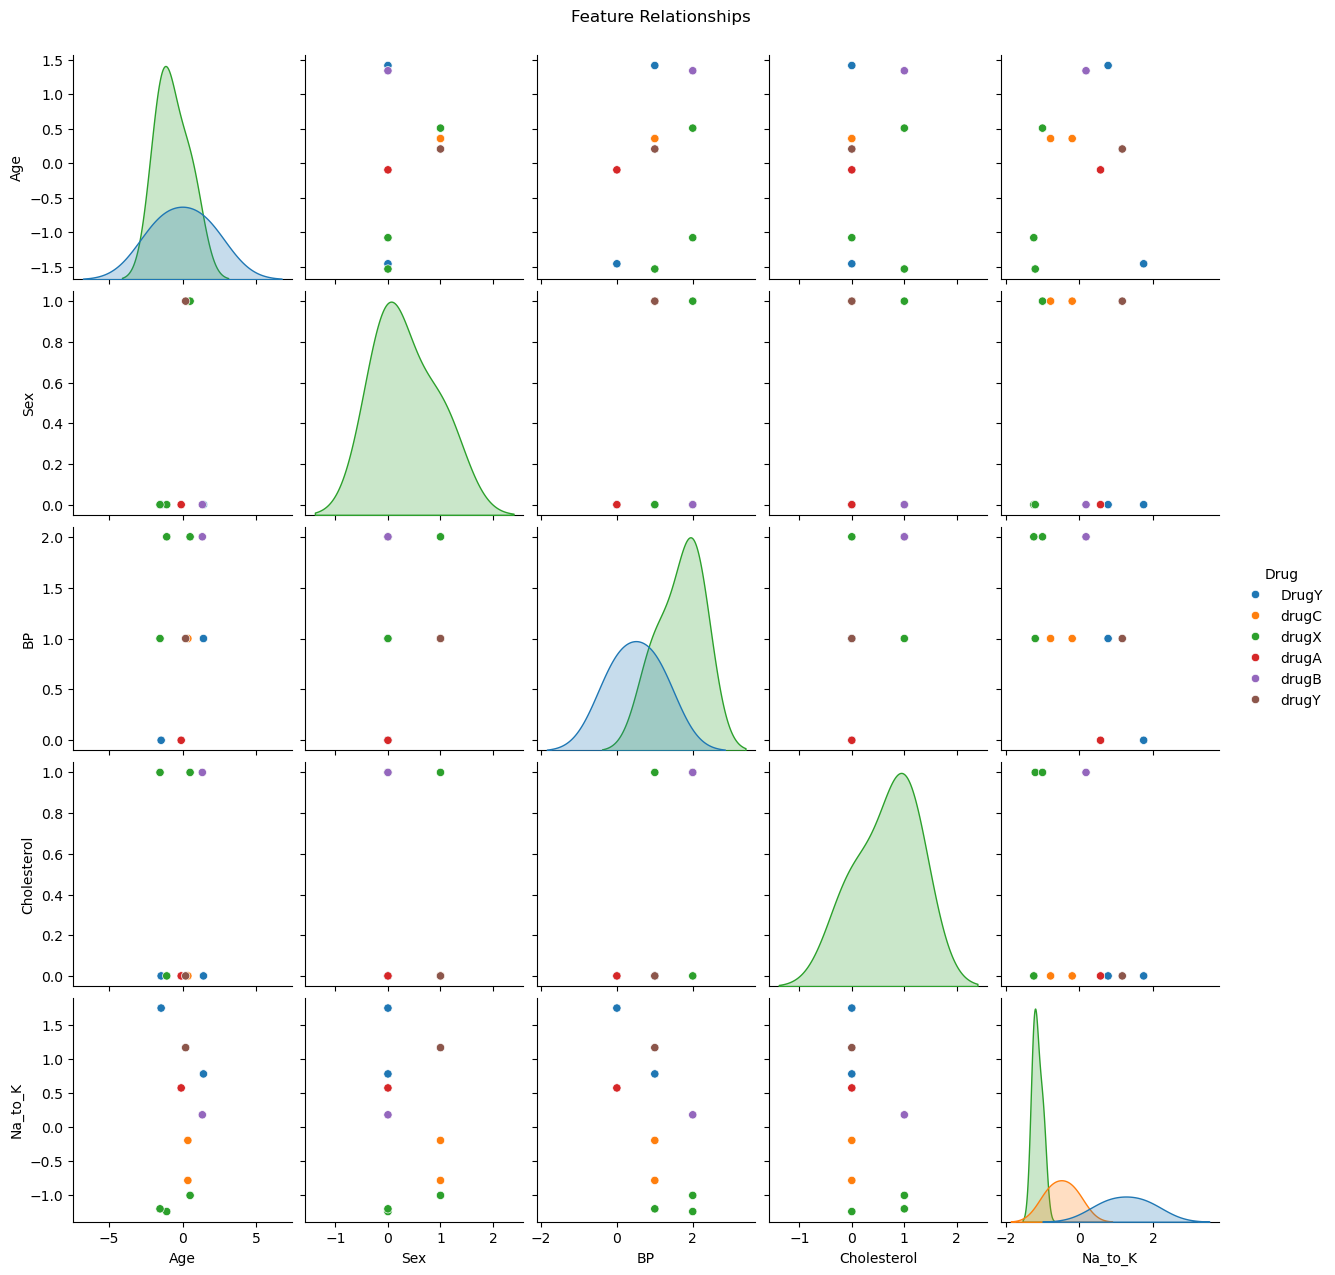

In [20]:
# 8. Exploratory Data Analysis (EDA)
sns.heatmap(df.drop('Drug', axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.boxplot(data=df[['Age', 'Na_to_K']])
plt.title("Boxplot - Age & Na_to_K")
plt.show()

sns.countplot(x='Drug', data=df)
plt.title("Drug Class Distribution")
plt.show()

sns.pairplot(df, hue='Drug')
plt.suptitle("Feature Relationships", y=1.02)
plt.show()



In [30]:
# 9. Prepare Data for Model (Stratified Split)
X = df.drop('Drug', axis=1)
y = df['Drug']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [31]:
# 10. Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

 Accuracy: 0.6666666666666666

 Classification Report:
               precision    recall  f1-score   support

       drugB       0.00      0.00      0.00         1
       drugC       1.00      1.00      1.00         1
       drugX       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



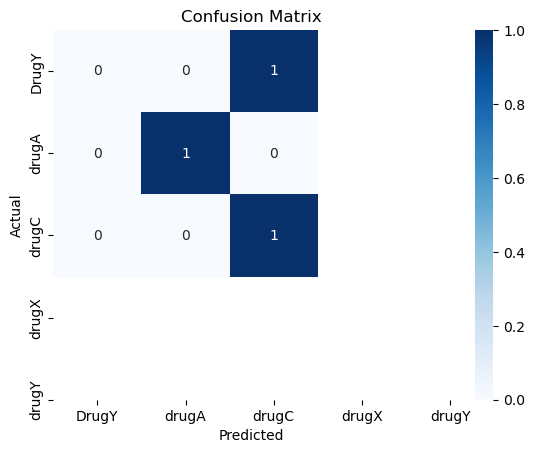

In [32]:
# 11. Evaluate Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")  # Hide undefined metric warnings for clean output

y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


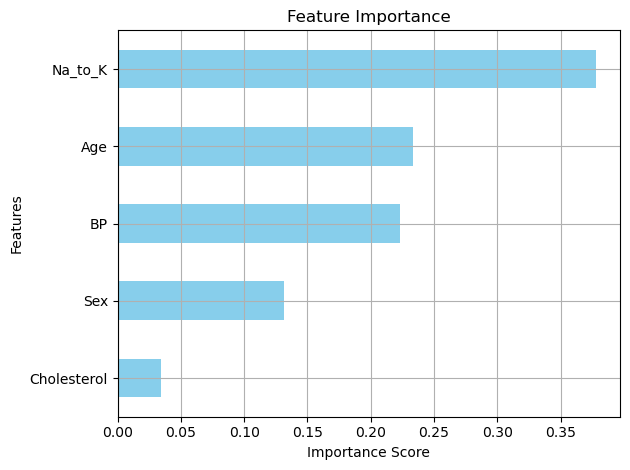

In [33]:
# 12. Feature Importance Plot
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.tight_layout()
plt.show()